In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'D:\Full Satck Data Science & AI\April\MOVIE RATINGS _ ADVANCE VISUALIZATION _ EDA 1\Movie-Rating.csv')

In [3]:
data

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [4]:
data = data.rename(columns = {'Year of release' : 'Year', 'Rotten Tomatoes Ratings %' : 'Critic_Rating',
             'Audience Ratings %' : 'Audience_Rating', 'Budget (million $)' : 'Budget_Milloins' })

In [5]:
len(data)
data.head()
data.tail()
data['Film'].count()
s = data.describe()
s.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Critic_Rating,8.0,108.840321,184.273521,0.000000,26.059818,46.654741,76.750000,559.0
Audience_Rating,8.0,113.446384,182.532724,0.000000,39.456722,58.372093,78.000000,559.0
Budget_Milloins,8.0,134.745994,195.659177,0.000000,31.250000,49.483977,123.750000,559.0
Year,8.0,1576.814336,814.058812,1.362632,1645.000000,2008.500000,2009.364043,2011.0


In [6]:
data[['Film','Genre','Year']].head(3)

,Film,Genre,Year
0,(500) Days of Summer,Comedy,2009
1,"10,000 B.C.",Adventure,2008
2,12 Rounds,Action,2009


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   Critic_Rating    559 non-null    int64 
 3   Audience_Rating  559 non-null    int64 
 4   Budget_Milloins  559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
data.Film = data.Film.astype('category')
data.Genre = data.Genre.astype('category')
data.Year = data.Year.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   Critic_Rating    559 non-null    int64   
 3   Audience_Rating  559 non-null    int64   
 4   Budget_Milloins  559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [9]:
s = data.iloc[0:100]
s.shape


(100, 6)

In [10]:
s.head()

,Film,Genre,Critic_Rating,Audience_Rating,Budget_Milloins,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
s.Film.isnull().any()

False

In [12]:
s.Genre.isnull().any()

False

In [13]:
s.Critic_Rating.isnull().any()

False

In [14]:
s.Audience_Rating.isnull().any()

False

In [15]:
s.Budget_Milloins.isnull().any()

False

In [16]:
s.Year.isnull().any()

False

# Bar Chat

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


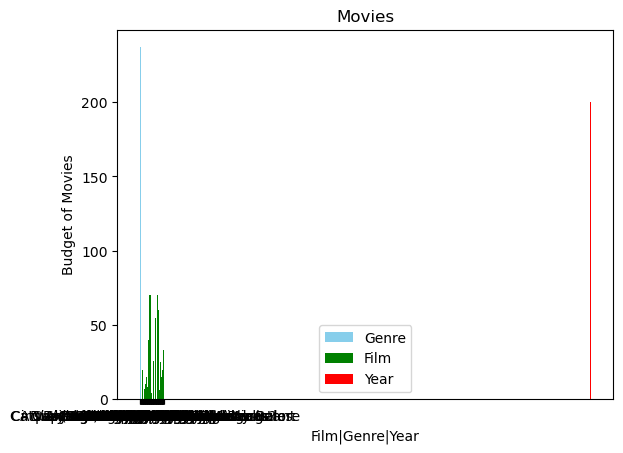

In [17]:
plt.bar(s.Genre, s.Budget_Milloins, width=0.8, color='skyblue')
plt.bar(s.Film, s.Budget_Milloins, width=0.8, color='g')
plt.bar(s.Year, s.Budget_Milloins, width=0.8, color='r')
plt.title('Movies')
plt.xlabel('Film|Genre|Year')
plt.ylabel('Budget of Movies')
# plt.bar(data[data.Genre == 'Drama'],Bughet_Millions, bottom=data.Year, width=0.8, color='r')
plt.legend(['Genre','Film','Year'])

plt.show()

# Pie Chart

In [18]:
s.Year.unique()

[2009, 2008, 2010, 2007, 2011]
Categories (5, int64): [2007, 2008, 2009, 2010, 2011]

In [19]:
y = s.loc[0:10]

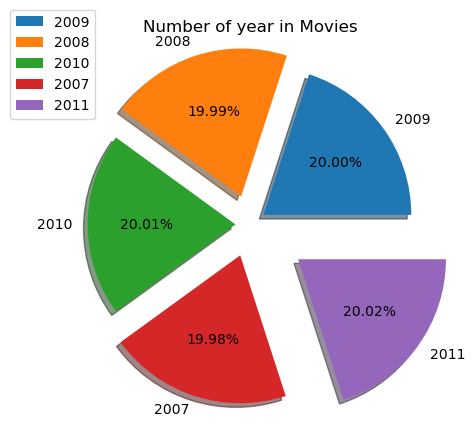

In [20]:
plt.pie(y.Year.unique(), labels=y.Year.unique(), autopct="%1.2f%%", explode=(0.11,0.2,0.1,0.22,0.4), 
        shadow = True)
plt.title("Number of year in Movies")
plt.legend(bbox_to_anchor=(0.10,1.1))
plt.show()

# Scatter Plot

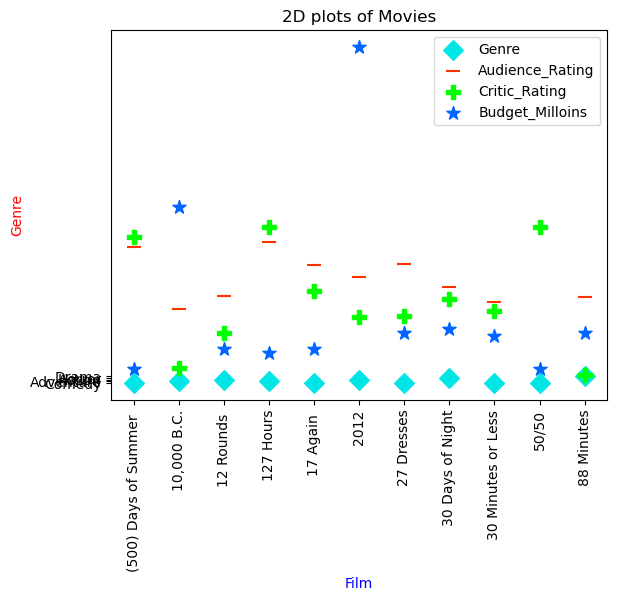

In [21]:
plt.scatter(y.Film,y.Genre, s=100, color='#00e6e6', marker='D')
plt.scatter(y.Film,y.Audience_Rating, s=100, color='#ff3300', marker='_')
plt.scatter(y.Film,y.Critic_Rating, s=100, color='#00ff00', marker='P')
plt.scatter(y.Film,y.Budget_Milloins, s=100, color='#0066ff',marker='*')
plt.title('2D plots of Movies')
plt.xlabel('Film',color='b')
plt.ylabel('Genre',color='r')
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.legend(['Genre','Audience_Rating','Critic_Rating','Budget_Milloins'],loc=('best'))

plt.show()

# Plot plot

AttributeError: Line2D.set() got an unexpected keyword argument 'makeredgecolor'

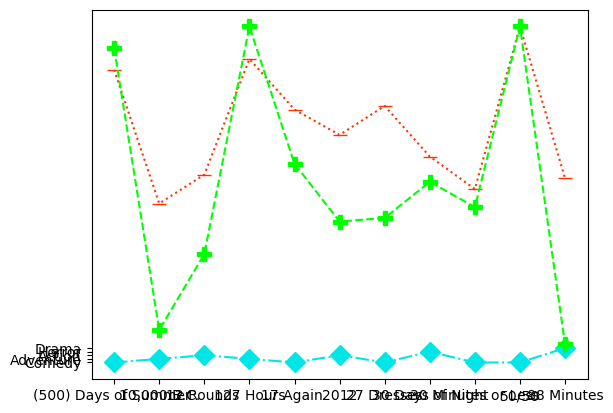

In [38]:
plt.plot(y.Film,y.Genre, ms=10, ls='dashdot', color='#00e6e6', marker='D')
plt.plot(y.Film,y.Audience_Rating, ls=':', ms=10, color='#ff3300', marker='_')
plt.plot(y.Film,y.Critic_Rating, ms=10, ls='--', color='#00ff00', marker='P')
plt.plot(y.Film,y.Budget_Milloins, ms=10, ls='solid', color='#0066ff',marker='*',markerfacecolor='white',makeredgecolor='black')
plt.title('2D plots of Movies')
plt.xlabel('Film',color='b')
plt.ylabel('Genre',color='r')
plt.legend(['Genre','Audience_Rating','Critic_Rating','Budget_Milloins'],loc=('best'))
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 7, step=1.5),rotation='horizontal')
plt.show()

# Box Plot or Whisker 

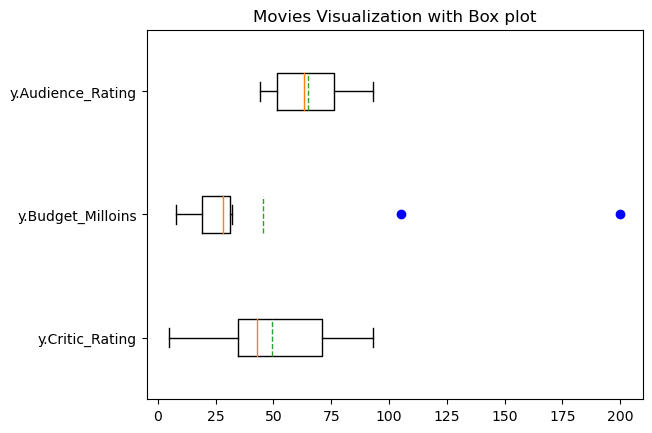

In [36]:
plt.boxplot([y.Critic_Rating,y.Budget_Milloins, y.Audience_Rating],
            showmeans=True, meanline=True, sym='b', vert=False,
           labels=['y.Critic_Rating','y.Budget_Milloins','y.Audience_Rating'])
plt.title('Movies Visualization with Box plot')
plt.show()